# _COMO O ACESSO A ESCOLARIDADE INFLUENCIA O INDIVÍDUO A MANTER-SE CONECTADO?_

__Bibliotecas importadas:__

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from math import *
from scipy import stats

__Checando o diretório:__

In [104]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Dell\Documents\Insper\2A\Dados\DS18\PNAD 2011


__Lendo o arquivo PES:__

In [105]:
dados = pd.read_csv('../../Excels/PNAD2011/PES2011.csv')

In [106]:
dados2 = pd.read_csv('../../Excels/PNAD2015/PES2015.csv')

Selecionando colunas:

In [107]:
dados = dados.loc[:, ['V9532', 'V4801', 'V06111', 'V06112']]
dados.tail()

,V9532,V4801,V06111,V06112
358914,NaN,15.0,NaN,NaN
358915,7000.0,NaN,1.0,1.0
358916,3500.0,NaN,1.0,1.0
358917,NaN,22.0,1.0,1.0
358918,NaN,13.0,NaN,NaN


In [108]:
dados2 = dados2.loc[:, ['V9532', 'V4801', 'V06111', 'V06112']]
dados2.tail()

,V9532,V4801,V06111,V06112
356899,900.0,NaN,1.0,1.0
356900,NaN,NaN,1.0,1.0
356901,300.0,22.0,1.0,1.0
356902,NaN,22.0,1.0,1.0
356903,NaN,12.0,NaN,NaN


__Removendo outliers da coluna Renda__

In [109]:
dados.V9532.loc[(dados.V9532 >= 50000)] = 0
dados.V9532.describe()

count    157339.000000
mean       1233.785705
std        1836.310814
min           0.000000
25%         545.000000
50%         750.000000
75%        1200.000000
max       45000.000000
Name: V9532, dtype: float64

In [110]:
dados2.V9532.loc[(dados2.V9532 >= 50000)] = 0
dados2.V9532.describe()

count    154385.000000
mean       1739.271639
std        2343.531583
min           0.000000
25%         788.000000
50%        1100.000000
75%        1900.000000
max       48000.000000
Name: V9532, dtype: float64

#  __Para escolaridade:__

__Escolaridade é a variável categórica ordinal com maior número de categorias. 
Várias células serão utilizadas em sequência.__

In [111]:
dados.V4801.loc[(dados.V4801 == 1) | (dados.V4801 == 2)] = 'Em alfabetização'

In [112]:
dados.V4801.loc[(dados.V4801 == 3) | (dados.V4801 == 21)] = 'Jovens e Adultos em alfabetização ou cursando Ensino Fundamental'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [113]:
dados.V4801.loc[(dados.V4801 == 23)] = 'Jovens e Adultos cursando Ensino Médio'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [114]:
dados.V4801.loc[(dados.V4801 == 4) | (dados.V4801 == 5) | (dados.V4801 == 6) | (dados.V4801 == 7) | (dados.V4801 == 12) | (dados.V4801 == 13) | (dados.V4801 == 14) | (dados.V4801 == 15)] = 'Ensino Fundamental I em tempo regular'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [115]:
dados.V4801.loc[(dados.V4801 == 8) | (dados.V4801 == 9) | (dados.V4801 == 10) | (dados.V4801 == 11) | (dados.V4801 == 16) | (dados.V4801 == 17) | (dados.V4801 == 18) | (dados.V4801 == 19) | (dados.V4801 == 20)] = 'Ensino Fundamental I em tempo regular'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [116]:
dados.V4801.loc[(dados.V4801 == 22)] = 'Ensino Médio em tempo regular'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [117]:
dados.V4801.loc[(dados.V4801 == 24)] = 'Pré-Vestibulando'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [118]:
dados.V4801.loc[(dados.V4801 == 25)] = 'Ensino Superior, Mestrando ou Doutorando'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Agora para 2015:

In [119]:
dados2.V4801.loc[(dados2.V4801 == 1) | (dados2.V4801 == 2)] = 'Em alfabetização'

In [120]:
dados2.V4801.loc[(dados2.V4801 == 3) | (dados2.V4801 == 21)] = 'Jovens e Adultos em alfabetização ou cursando Ensino Fundamental'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [121]:
dados2.V4801.loc[(dados2.V4801 == 23)] = 'Jovens e Adultos cursando Ensino Médio'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [122]:
dados2.V4801.loc[(dados2.V4801 == 4) | (dados2.V4801 == 5) | (dados2.V4801 == 6) | (dados2.V4801 == 7) | (dados2.V4801 == 12) | (dados2.V4801 == 13) | (dados2.V4801 == 14) | (dados2.V4801 == 15)] = 'Ensino Fundamental I em tempo regular'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [123]:
dados2.V4801.loc[(dados2.V4801 == 8) | (dados2.V4801 == 9) | (dados2.V4801 == 10) | (dados2.V4801 == 11) | (dados2.V4801 == 16) | (dados2.V4801 == 17) | (dados2.V4801 == 18) | (dados2.V4801 == 19) | (dados2.V4801 == 20)] = 'Ensino Fundamental I em tempo regular'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [124]:
dados2.V4801.loc[(dados2.V4801 == 22)] = 'Ensino Médio em tempo regular'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [125]:
dados2.V4801.loc[(dados2.V4801 == 24)] = 'Pré-Vestibulando'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [126]:
dados2.V4801.loc[(dados2.V4801 == 25)] = 'Ensino Superior, Mestrando ou Doutorando'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Tratando NaN usando o método__ `.fillna()`

In [127]:
dados.V4801 = dados.V4801.fillna(value = 'Não Informado')
dados2.V4801 = dados2.V4801.fillna(value = 'Não Informado')

__Checando resultados:__

In [128]:
dados.head()

,V9532,V4801,V06111,V06112
0,0.0,Não Informado,3.0,1.0
1,NaN,"Ensino Superior, Mestrando ou Doutorando",1.0,1.0
2,NaN,Ensino Médio em tempo regular,1.0,3.0
3,NaN,Ensino Fundamental I em tempo regular,NaN,NaN
4,2800.0,Não Informado,3.0,1.0


In [129]:
dados2.head()

,V9532,V4801,V06111,V06112
0,800.0,Não Informado,1.0,1.0
1,1150.0,Não Informado,1.0,1.0
2,880.0,"Ensino Superior, Mestrando ou Doutorando",1.0,1.0
3,3000.0,Não Informado,1.0,1.0
4,NaN,Ensino Fundamental I em tempo regular,1.0,1.0


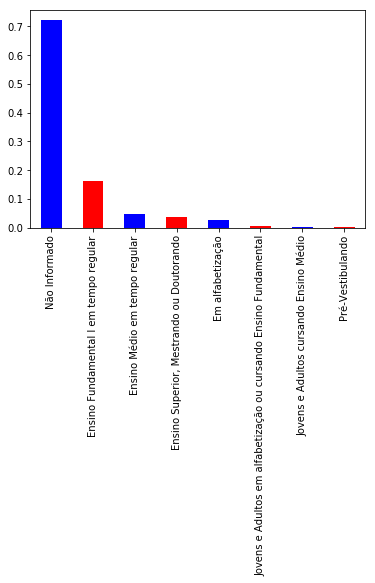

In [130]:
a = dados.V4801.value_counts(normalize = 1)
a.plot(kind='bar', color=('blue', 'red'), legend=False)

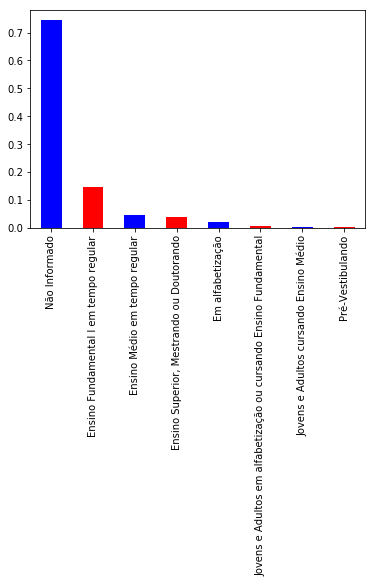

In [131]:
b = dados2.V4801.value_counts(normalize = 1)
b.plot(kind='bar', color=('blue', 'red'), legend=False)

# __Para Internet__:

__Atribuindo valores categóricos:__

In [132]:
dados.V06111.loc[(dados.V06111 == 1)] = 'Sim'
dados.V06111.loc[(dados.V06111 == 3)] = 'Não'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Agora para 2015

In [133]:
dados2.V06111.loc[(dados2.V06111 == 1)] = 'Sim'
dados2.V06111.loc[(dados2.V06111 == 3)] = 'Não'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Tratando NaN usando o método__ `.fillna()`

In [134]:
dados.V06111 = dados.V06111.fillna(value = 'Não Informado')

In [135]:
dados2.V06111 = dados2.V06111.fillna(value = 'Não Informado')

__Checando resultados:__

In [136]:
dados.head()

,V9532,V4801,V06111,V06112
0,0.0,Não Informado,Não,1.0
1,NaN,"Ensino Superior, Mestrando ou Doutorando",Sim,1.0
2,NaN,Ensino Médio em tempo regular,Sim,3.0
3,NaN,Ensino Fundamental I em tempo regular,Não Informado,NaN
4,2800.0,Não Informado,Não,1.0


In [137]:
dados2.head()

,V9532,V4801,V06111,V06112
0,800.0,Não Informado,Sim,1.0
1,1150.0,Não Informado,Sim,1.0
2,880.0,"Ensino Superior, Mestrando ou Doutorando",Sim,1.0
3,3000.0,Não Informado,Sim,1.0
4,NaN,Ensino Fundamental I em tempo regular,Sim,1.0


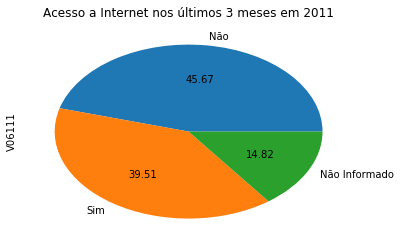

In [138]:
c = dados.V06111.value_counts(normalize = 1)
c.plot(kind='pie', autopct="%0.2f")
plt.title('Acesso a Internet nos últimos 3 meses em 2011')

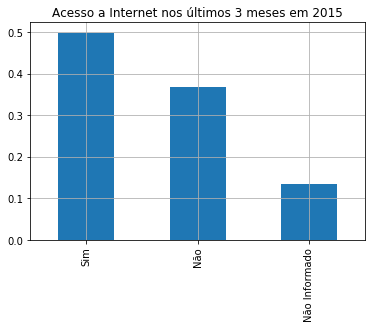

In [139]:
d = dados2.V06111.value_counts(normalize = 1)
d.plot(kind='bar')
#plt.xlim([0,1])
plt.grid()
plt.title('Acesso a Internet nos últimos 3 meses em 2015')
#, autopct="%0.2f"

# __Para celular pessoal:__

__Atribuindo valores categóricos:__

In [140]:
dados.V06112.loc[(dados.V06112 == 1)] = 'Sim'
dados.V06112.loc[(dados.V06112 == 3)] = 'Não'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [141]:
dados2.V06112.loc[(dados2.V06112 == 1)] = 'Sim'
dados2.V06112.loc[(dados2.V06112 == 3)] = 'Não'

C:\Insper\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Tratando NaN usando o método__ `.fillna()`

In [142]:
dados.V06112 = dados.V06112.fillna(value = 'Não Informado')

In [143]:
dados2.V06112 = dados2.V06112.fillna(value = 'Não Informado')

__Checando a base de dados para Celular em 2011:__

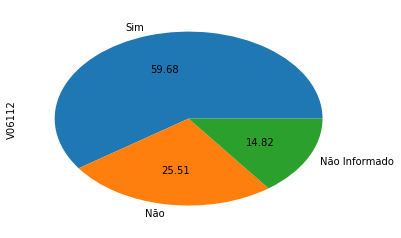

In [144]:
e = dados.V06112.value_counts(normalize = 1)
e.plot(kind='pie',  legend=False, autopct="%0.2f")

__Agora para 2015:__

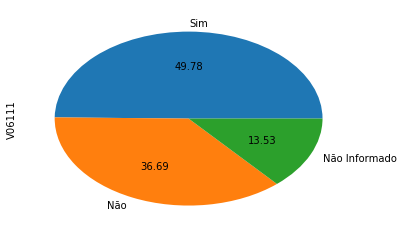

In [145]:
f = dados2.V06111.value_counts(normalize = 1)
f.plot(kind='pie',  legend=False, autopct="%0.2f")

# Renomeando colunas:

In [146]:
dados.columns = ['Renda11', 'Escolaridade11', 'Internet11', 'Celular11']

In [147]:
dados2.columns = ['Renda15', 'Escolaridade15', 'Internet15', 'Celular15']

In [148]:
dados.head()

,Renda11,Escolaridade11,Internet11,Celular11
0,0.0,Não Informado,Não,Sim
1,NaN,"Ensino Superior, Mestrando ou Doutorando",Sim,Sim
2,NaN,Ensino Médio em tempo regular,Sim,Não
3,NaN,Ensino Fundamental I em tempo regular,Não Informado,Não Informado
4,2800.0,Não Informado,Não,Sim


In [149]:
dados2.head()

,Renda15,Escolaridade15,Internet15,Celular15
0,800.0,Não Informado,Sim,Sim
1,1150.0,Não Informado,Sim,Sim
2,880.0,"Ensino Superior, Mestrando ou Doutorando",Sim,Sim
3,3000.0,Não Informado,Sim,Sim
4,NaN,Ensino Fundamental I em tempo regular,Sim,Sim


# __Para Renda: SEPARAR EM SALÁRIOS MÍNIMON__

In [150]:
dados.Renda11.describe()

count    157339.000000
mean       1233.785705
std        1836.310814
min           0.000000
25%         545.000000
50%         750.000000
75%        1200.000000
max       45000.000000
Name: Renda11, dtype: float64

##### Máximo e máximo valor está explícito pelo describe()

#### Criando faixas de Renda:

In [151]:
step = ((2*(stats.percentileofscore(dados.Renda11, 75) - stats.percentileofscore(dados.Renda11, 25)))/(358918**(1/3)))*1000
print(step)

11.1733481526


In [152]:
step2 = ((2*(stats.percentileofscore(dados2.Renda15, 75) - stats.percentileofscore(dados2.Renda15, 25)))/(358918**(1/3)))*1000
print(step)

11.1733481526


Tomando uso do `.fillna`

In [153]:
dados.Renda11.fillna(value = 'Não Informado')
print('')

In [154]:
dados2.Renda15.fillna(value = 'Não Informado')
print('')

__Usando__ `boxplot` __e__ `histograma` __para checar a base de dados em 2011, depois para 2015:__

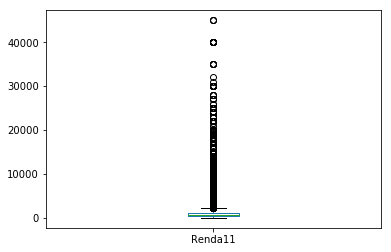

In [155]:
dados.Renda11.plot.box()

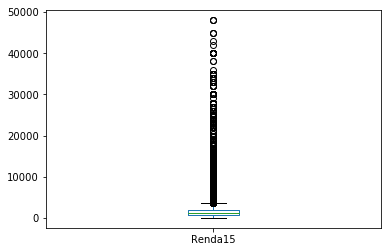

In [156]:
dados2.Renda15.plot.box()

### Vamos subdividir o grupo de renda em grupos menores usando o método `loc`

In [157]:
faixa1 = np.arange(0, 1000, 50)
grupo1_renda11 = dados.Renda11.loc[(dados.Renda11 > 1) & (dados.Renda11 < 1000)]
grupo1_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 1) & (dados2.Renda15 < 1000)]

In [158]:
def qcut (t, fx):
    transformacao = pd.cut(t, bins=np.r_[fx, np.inf], right=False)
    return transformacao

In [159]:
faixa2 = np.arange(1000, 2000, 50)
grupo2_renda11 = dados.Renda11.loc[(dados.Renda11 > 1000) & (dados.Renda11 <= 2000)]
grupo2_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 1000) & (dados2.Renda15 <= 2000)]

In [160]:
faixa3 = np.arange(2000, 3000, 50)
grupo3_renda11 = dados.Renda11.loc[(dados.Renda11 > 2000) & (dados.Renda11 <= 3000)]
grupo3_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 2000) & (dados2.Renda15 <= 3000)]

In [161]:
faixa4 = np.arange(3000, 4000, 50)
grupo4_renda11 = dados.Renda11.loc[(dados.Renda11 > 3000) & (dados.Renda11 <= 4000)]
grupo4_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 3000) & (dados2.Renda15 <= 4000)]

In [162]:
faixa5 = np.arange(4000, 5000, 50)
grupo5_renda11 = dados.Renda11.loc[(dados.Renda11 > 4000) & (dados.Renda11 <= 5000)]
grupo5_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 4000) & (dados2.Renda15 <= 5000)]

In [163]:
faixa6 = np.arange(5000, 6000, 50)
grupo6_renda11 = dados.Renda11.loc[(dados.Renda11 > 5000) & (dados.Renda11 <= 6000)]
grupo6_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 5000) & (dados2.Renda15 <= 6000)]

In [164]:
faixa7 = np.arange(6000, 7000, 50)
grupo7_renda11 = dados.Renda11.loc[(dados.Renda11 > 6000) & (dados.Renda11 <= 7000)]
grupo7_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 6000) & (dados2.Renda15 <= 7000)]

In [165]:
faixa8 = np.arange(7000, 8000, 50)
grupo8_renda11 = dados.Renda11.loc[(dados.Renda11 > 7000) & (dados.Renda11 <= 8000)]
grupo8_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 7000) & (dados2.Renda15 <= 8000)]

In [166]:
faixa9 = np.arange(8000, 9000, 50)
grupo9_renda11 = dados.Renda11.loc[(dados.Renda11 > 8000) & (dados.Renda11 <= 9000)]
grupo9_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 8000) & (dados2.Renda15 <= 9000)]

In [167]:
faixa10 = np.arange(9000, 10000, 50)
grupo10_renda11 = dados.Renda11.loc[(dados.Renda11 > 9000) & (dados.Renda11 <= 10000)]
grupo10_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 9000) & (dados2.Renda15 <= 10000)]

In [168]:
faixaL = np.arange(10000, 30000, 500)
grupoL_renda11 = dados.Renda11.loc[(dados.Renda11 > 10000) & (dados.Renda11 <= 30000)]
grupoL_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 10000) & (dados2.Renda15 <= 30000)]

In [169]:
um_renda11 = qcut(grupo1_renda11, faixa1)
um_renda15 = qcut(grupo1_renda15, faixa1)

In [170]:
dois_renda11 = qcut(grupo2_renda11, faixa2)
dois_renda15 = qcut(grupo2_renda15, faixa2)

In [171]:
tres_renda11 = qcut(grupo3_renda11, faixa3)
tres_renda15 = qcut(grupo3_renda15, faixa3)

In [172]:
quatro_renda11 = qcut(grupo4_renda11, faixa4)
quatro_renda15 = qcut(grupo4_renda15, faixa4)

In [173]:
cinco_renda11 = qcut(grupo5_renda11, faixa5)
cinco_renda15 = qcut(grupo5_renda15, faixa5)

In [174]:
seis_renda11 = qcut(grupo6_renda11, faixa6)
seis_renda15 = qcut(grupo6_renda15, faixa6)

In [175]:
sete_renda11 = qcut(grupo7_renda15, faixa7)
sete_renda15 = qcut(grupo7_renda15, faixa7)

In [206]:
oito_renda11 = qcut(grupo8_renda11, faixa8)
oito_renda15 = qcut(grupo8_renda15, faixa8)

In [207]:
nove_renda11 = qcut(grupo9_renda11, faixa9)
nove_renda15 = qcut(grupo9_renda15, faixa9)

In [209]:
dez_renda11 = qcut(grupo10_renda11, faixa10)
dez_renda15 = qcut(grupo10_renda15, faixa10)

In [210]:
large_renda11 = qcut(grupoL_renda11, faixaL)
large_renda15 = qcut(grupoL_renda11, faixaL)

# Exibição de cada grupo:

Grupo 1:

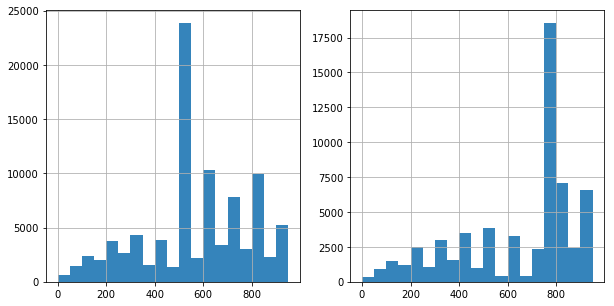

In [177]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo1_renda11, bins=faixa1, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo1_renda15, bins=faixa1, alpha=0.9)
plt.grid()

plt.show()

Grupo 2:

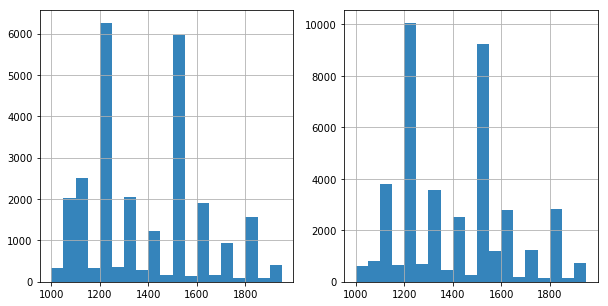

In [178]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo2_renda11, bins=faixa2, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo2_renda15, bins=faixa2, alpha=0.9)
plt.grid()

plt.show()

Grupo 3:

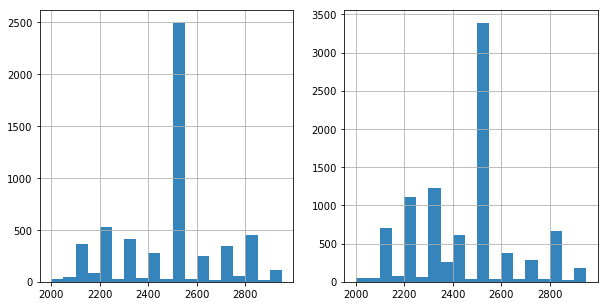

In [179]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo3_renda11, bins=faixa3, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo3_renda15, bins=faixa3, alpha=0.9)
plt.grid()

plt.show()

Grupo 4:

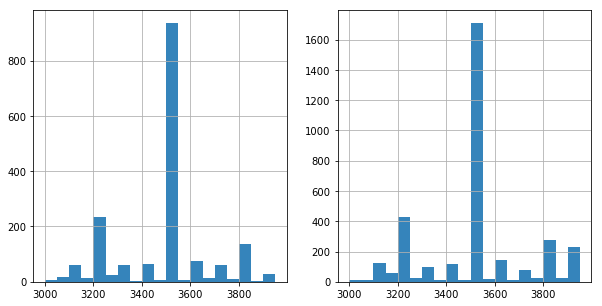

In [180]:
plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.hist(grupo4_renda11, bins=faixa4, alpha=0.9)
plt.grid()
plt.subplot(122)

plt.hist(grupo4_renda15, bins=faixa4, alpha=0.9)
plt.grid()
plt.show()

Grupo 5:

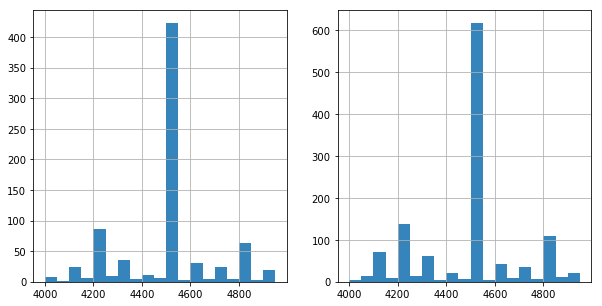

In [181]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo5_renda11, bins=faixa5, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo5_renda15, bins=faixa5, alpha=0.9)
plt.grid()

plt.show()

Grupo 6:

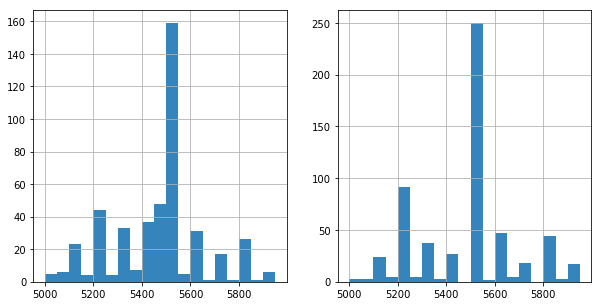

In [182]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo6_renda11, bins=faixa6, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo6_renda15, bins=faixa6, alpha=0.9)
plt.grid()

plt.show()

Grupo 7:

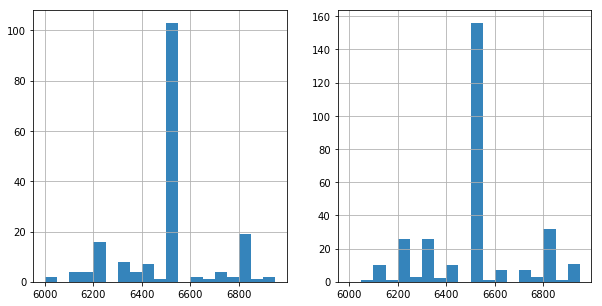

In [183]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo7_renda11, bins=faixa7, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo7_renda15, bins=faixa7, alpha=0.9)
plt.grid()

plt.show()

Grupo 8:

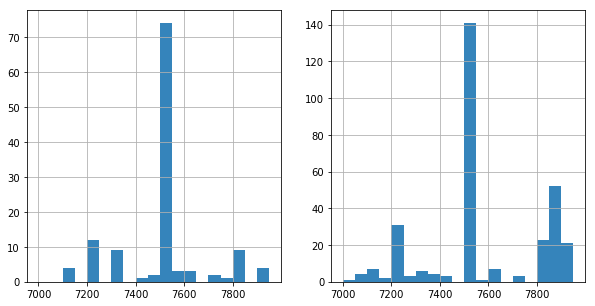

In [184]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo8_renda11, bins=faixa8, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo8_renda15, bins=faixa8, alpha=0.9)
plt.grid()

plt.show()

Grupo 9:

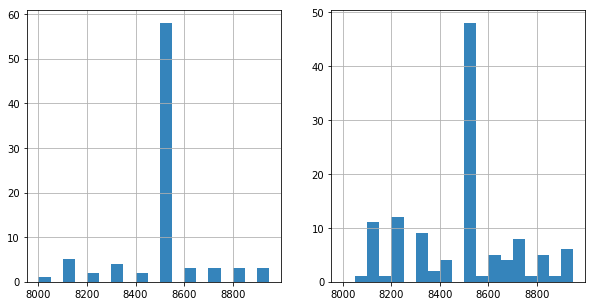

In [185]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo9_renda11, bins=faixa9, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo9_renda15, bins=faixa9, alpha=0.9)
plt.grid()

plt.show()

Grupo 10:

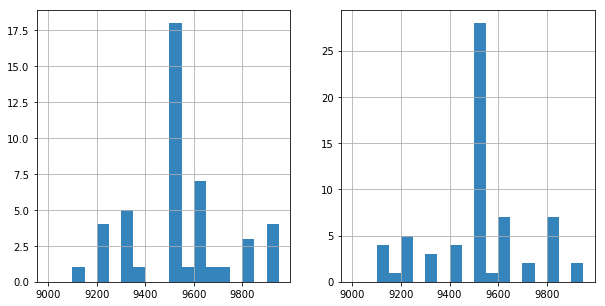

In [186]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo10_renda11, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupo10_renda15, bins=faixa10, alpha=0.9)
plt.grid()

plt.show()

Grupo Large:

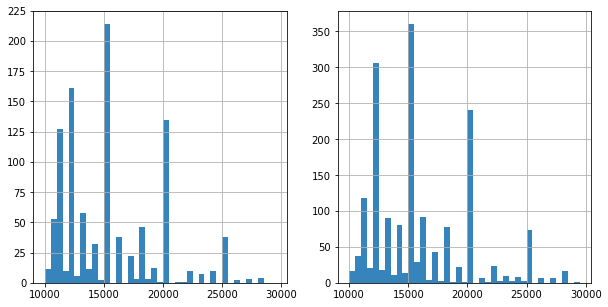

In [187]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupoL_renda11, bins=faixaL, alpha=0.9)
plt.grid()

plt.subplot(122)
plt.hist(grupoL_renda15, bins=faixaL, alpha=0.9)
plt.grid()

plt.show()

Denota-se que existem muitos outliers que estão atrapalhando

# __ Realizando Crosstabs: __

In [188]:
escolaridade_internet = pd.crosstab(dados.Escolaridade11, dados.Internet11, normalize = True)*100
escolaridade_internet

Internet11,Não,Não Informado,Sim
Escolaridade11,,,
Em alfabetização,0.011423,2.469638,0.004179
Ensino Fundamental I em tempo regular,4.181445,5.622717,6.567499
Ensino Médio em tempo regular,0.754209,0.000000,3.805037
"Ensino Superior, Mestrando ou Doutorando",0.071047,0.000000,3.527258
Jovens e Adultos cursando Ensino Médio,0.114789,0.000000,0.173298
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0.379473,0.000000,0.155188
Não Informado,40.150842,6.725473,25.199279
Pré-Vestibulando,0.005851,0.000000,0.081355


In [189]:
escolaridade_celular = pd.crosstab(dados.Escolaridade11, dados.Celular11, normalize = True)*100
escolaridade_celular

Celular11,Não,Não Informado,Sim
Escolaridade11,,,
Em alfabetização,0.013931,2.469638,0.001672
Ensino Fundamental I em tempo regular,6.000240,5.622717,4.748704
Ensino Médio em tempo regular,0.945339,0.000000,3.613907
"Ensino Superior, Mestrando ou Doutorando",0.104480,0.000000,3.493825
Jovens e Adultos cursando Ensino Médio,0.043185,0.000000,0.244902
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0.213697,0.000000,0.320964
Não Informado,18.181261,6.725473,47.168860
Pré-Vestibulando,0.003343,0.000000,0.083863


In [190]:
escolaridade_celular15 = pd.crosstab(dados2.Escolaridade15, dados2.Celular15, normalize = True)*100
escolaridade_celular15

Celular15,Não,Não Informado,Sim
Escolaridade15,,,
Em alfabetização,0.004203,2.053213,0.001401
Ensino Fundamental I em tempo regular,4.065239,5.331686,5.173100
Ensino Médio em tempo regular,0.507980,0.000000,3.859861
"Ensino Superior, Mestrando ou Doutorando",0.055757,0.000000,3.897687
Jovens e Adultos cursando Ensino Médio,0.022415,0.000000,0.244043
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0.105070,0.000000,0.289434
Não Informado,13.494385,6.149553,54.704626
Pré-Vestibulando,0.000560,0.000000,0.039787


In [191]:
escolaridade_internet15 = pd.crosstab(dados2.Escolaridade15, dados2.Internet15, normalize = True)*100
escolaridade_internet15

Internet15,Não,Não Informado,Sim
Escolaridade15,,,
Em alfabetização,0.003923,2.053213,0.001681
Ensino Fundamental I em tempo regular,2.928238,5.331686,6.310100
Ensino Médio em tempo regular,0.509941,0.000000,3.857900
"Ensino Superior, Mestrando ou Doutorando",0.071448,0.000000,3.881996
Jovens e Adultos cursando Ensino Médio,0.063883,0.000000,0.202575
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0.200054,0.000000,0.194450
Não Informado,32.907449,6.149553,35.291563
Pré-Vestibulando,0.000560,0.000000,0.039787


In [192]:
#escolaridade_celular.plot(kind = 'bar', normed = 1)
#escolaridade_celular15.plot(kind = 'bar', normed = 1)

In [193]:
renda1_escolaridade11 = pd.crosstab(dados.Escolaridade11, um_renda11)
renda1_escolaridade15 = pd.crosstab(dados2.Escolaridade15, um_renda15)
renda1_escolaridade11

Renda11,"[0.0, 50.0)","[50.0, 100.0)","[100.0, 150.0)","[150.0, 200.0)","[200.0, 250.0)","[250.0, 300.0)","[300.0, 350.0)","[350.0, 400.0)","[400.0, 450.0)","[450.0, 500.0)","[500.0, 550.0)","[550.0, 600.0)","[600.0, 650.0)","[650.0, 700.0)","[700.0, 750.0)","[750.0, 800.0)","[800.0, 850.0)","[850.0, 900.0)","[900.0, 950.0)","[950.0, inf)"
Escolaridade11,,,,,,,,,,,,,,,,,,,,
Em alfabetização,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ensino Fundamental I em tempo regular,97,205,208,125,235,121,130,49,119,33,291,21,87,22,44,14,34,8,21,4
Ensino Médio em tempo regular,28,89,164,123,262,291,296,114,211,89,901,87,277,94,203,80,173,41,74,23
"Ensino Superior, Mestrando ou Doutorando",1,4,17,15,35,62,102,88,105,67,1062,105,448,200,436,195,540,140,294,88
Jovens e Adultos cursando Ensino Médio,3,4,10,12,17,17,22,10,23,11,126,15,59,26,50,18,46,12,22,8
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,9,20,46,44,65,36,41,16,31,15,199,17,71,22,57,16,38,8,12,5
Não Informado,456,1174,1896,1706,3143,2107,3703,1255,3327,1127,21280,1963,9353,3024,7054,2735,9104,2077,4106,1329
Pré-Vestibulando,0,1,0,1,1,3,3,0,2,0,19,1,12,6,7,1,9,1,3,2


In [194]:
renda2_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo2_renda11)
renda2_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo2_renda15)

In [195]:
renda3_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo3_renda11)
renda3_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo3_renda15)

In [196]:
renda4_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo4_renda11)
renda4_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo4_renda15)

In [197]:
renda5_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo5_renda11)
renda5_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo5_renda15)

In [198]:
renda6_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo6_renda11)
renda6_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo6_renda15)

In [199]:
renda7_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo7_renda11)
renda7_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo7_renda15)

In [200]:
renda8_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo8_renda11)
renda8_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo8_renda15)

In [201]:
renda9_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo9_renda11)
renda9_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo9_renda15)

In [202]:
renda10_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo10_renda11)
renda10_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo10_renda15)

In [203]:
rendaL_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupoL_renda11)
rendaL_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupoL_renda15)

In [204]:
plt.figure(figsize = (200, 150))

plt.subplot(4,3,1)
plt.hist(grupo1_renda11, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,2)
plt.hist(grupo2_renda15, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,3)
plt.hist(grupo3_renda11, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,4)
plt.hist(grupo4_renda15, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,5)
plt.hist(grupo5_renda11, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,6)
plt.hist(grupo6_renda15, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,7)
plt.hist(grupo7_renda11, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,8)
plt.hist(grupo8_renda15, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,9)
plt.hist(grupo9_renda11, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,10)
plt.hist(grupo10_renda15, bins=faixa10, alpha=0.9)
plt.grid()

plt.subplot(4,3,11)
plt.hist(grupoL_renda15, bins=faixa10, alpha=0.9)
plt.grid()

plt.show()